# Text Preprocessing with Keras

In [21]:
# importing libraries

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D
import tsensor
import numpy as np

In [23]:
# !pip install tensor-sensor

## Tokenization

In [24]:
# Tokenising sentences
sentences = [
    'The quick brown fox jumps over the lazy dog.'
]
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)

In [25]:
tokenizer.word_index

{'the': 1,
 'quick': 2,
 'brown': 3,
 'fox': 4,
 'jumps': 5,
 'over': 6,
 'lazy': 7,
 'dog': 8}

In [26]:
train_sequence = tokenizer.texts_to_sequences(sentences)
train_sequence = np.array(train_sequence)
print(train_sequence)

[[1 2 3 4 5 6 1 7 8]]


## Creating Embedding Layer

In [27]:
# Create a random embedding layer

embedding = Embedding(input_dim=len(train_sequence[0]), output_dim=128)

In [28]:
# Get the embeddings of the train sample

train_sample = embedding(train_sequence)

In [29]:
train_sequence.shape

(1, 9)

In [30]:
train_sample.shape

TensorShape([1, 9, 128])

findfont: Font family ['Hack'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Hack'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Hack'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Hack'] not found. Falling back to DejaVu Sans.


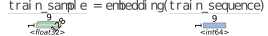

In [31]:
with tsensor.explain(fontname='Hack', dimfontname='Hack'):
    train_sample = embedding(train_sequence)

In [32]:
train_sample[0]

<tf.Tensor: shape=(9, 128), dtype=float32, numpy=
array([[-0.03965417, -0.00790596,  0.02250386, ..., -0.00711304,
         0.0348619 , -0.03054032],
       [-0.01829185, -0.00565315,  0.00401843, ...,  0.04179584,
        -0.04430616, -0.02935187],
       [-0.04157542,  0.02418882, -0.02108717, ..., -0.04459545,
         0.04110438,  0.02750467],
       ...,
       [-0.03965417, -0.00790596,  0.02250386, ..., -0.00711304,
         0.0348619 , -0.03054032],
       [ 0.01398605,  0.00787284,  0.03166661, ...,  0.04638031,
         0.00167648, -0.03506005],
       [-0.00333165,  0.0473013 , -0.02133602, ..., -0.03033694,
        -0.0021772 , -0.00044737]], dtype=float32)>

## Averaging across tokens

In [33]:
GlobalAveragePooling1D()(train_sample)

<tf.Tensor: shape=(1, 128), dtype=float32, numpy=
array([[-1.38108581e-02,  2.83379760e-03,  7.23203038e-06,
         4.19353275e-03,  1.17583657e-02, -6.23975135e-03,
        -4.00340790e-03, -1.63248053e-03,  2.22287606e-03,
        -1.03088655e-02, -7.68766878e-03, -5.52901812e-03,
         1.08592110e-02,  1.37288487e-02, -2.61432305e-03,
        -2.78930855e-03,  1.80151630e-02,  4.51590540e-03,
        -1.21689737e-02, -8.79610702e-03,  1.42722093e-02,
         1.26729906e-02,  2.30360369e-04, -2.54337280e-03,
         4.28064307e-03,  1.67908370e-02, -1.59642100e-02,
        -5.48344292e-03,  8.81851185e-03, -1.73229054e-02,
         4.37776279e-03, -1.25806443e-02, -7.00170873e-03,
         4.36316477e-03,  1.58517307e-03,  1.30676024e-03,
         7.35207647e-03, -4.90684877e-04,  1.90541595e-02,
         1.33827142e-02,  4.33225883e-03,  6.75351219e-03,
        -8.46739486e-03,  1.80025562e-03,  8.93737003e-03,
        -1.36905760e-02,  1.14654833e-02, -4.29094862e-03,
      

![](images/Emb6.png)

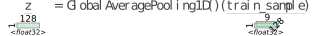

In [34]:
with tsensor.explain(fontname='Hack', dimfontname='Hack'):
    z = GlobalAveragePooling1D()(train_sample)

## Creating Word Embeddings for more than one sentence

In [35]:
# More than one sentence

test_corpus = [
    'The quick brown fox jumps over the lazy dog.',
    'The quick brown fox.',
    'The lazy dog.',
    'The dog.',
    'Dog and the fox.',
    'Hello, world!'
]
encoded_sentences = tokenizer.texts_to_sequences(test_corpus)
for sentence, encoded_sentence in zip(test_corpus, encoded_sentences):
    print(sentence, encoded_sentence)

The quick brown fox jumps over the lazy dog. [1, 2, 3, 4, 5, 6, 1, 7, 8]
The quick brown fox. [1, 2, 3, 4]
The lazy dog. [1, 7, 8]
The dog. [1, 8]
Dog and the fox. [8, 1, 4]
Hello, world! []


## Padding Sequences

In [36]:
# Length of each sentence in the corpus

[len(sentence) for sentence in encoded_sentences]

[9, 4, 3, 2, 3, 0]

In [37]:
# Length of the longest sentence

max([len(sentence) for sentence in encoded_sentences])

9

In [38]:
MAX_SEQUENCE_LENGTH = 9

In [39]:
# Padding sequences that are shorter than the longest sequence

X = pad_sequences(encoded_sentences, maxlen=MAX_SEQUENCE_LENGTH)
X

array([[1, 2, 3, 4, 5, 6, 1, 7, 8],
       [0, 0, 0, 0, 0, 1, 2, 3, 4],
       [0, 0, 0, 0, 0, 0, 1, 7, 8],
       [0, 0, 0, 0, 0, 0, 0, 1, 8],
       [0, 0, 0, 0, 0, 0, 8, 1, 4],
       [0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)

## Embedding Layer

In [40]:
# Training data with more than 1 sentences

X.shape

(6, 9)

In [41]:
# Embeddings of the larger corpus

X_embedded = embedding(X)

In [42]:
X_embedded.shape

TensorShape([6, 9, 128])

In [43]:
X_embedded

<tf.Tensor: shape=(6, 9, 128), dtype=float32, numpy=
array([[[-0.03965417, -0.00790596,  0.02250386, ..., -0.00711304,
          0.0348619 , -0.03054032],
        [-0.01829185, -0.00565315,  0.00401843, ...,  0.04179584,
         -0.04430616, -0.02935187],
        [-0.04157542,  0.02418882, -0.02108717, ..., -0.04459545,
          0.04110438,  0.02750467],
        ...,
        [-0.03965417, -0.00790596,  0.02250386, ..., -0.00711304,
          0.0348619 , -0.03054032],
        [ 0.01398605,  0.00787284,  0.03166661, ...,  0.04638031,
          0.00167648, -0.03506005],
        [-0.00333165,  0.0473013 , -0.02133602, ..., -0.03033694,
         -0.0021772 , -0.00044737]],

       [[-0.01643976,  0.00661799,  0.02745568, ..., -0.04415154,
         -0.02003709, -0.03453634],
        [-0.01643976,  0.00661799,  0.02745568, ..., -0.04415154,
         -0.02003709, -0.03453634],
        [-0.01643976,  0.00661799,  0.02745568, ..., -0.04415154,
         -0.02003709, -0.03453634],
        ...,
 

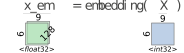

In [44]:
with tsensor.explain(fontname='Hack', dimfontname='Hack'):
    x_em = embedding(X)

In [45]:
X.shape

(6, 9)

In [46]:
x_em.shape

TensorShape([6, 9, 128])

## Averaging across tokens

![](images/Emb6.png)

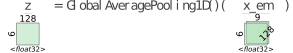

In [47]:
with tsensor.explain(fontname='Hack', dimfontname='Hack'):
    z = GlobalAveragePooling1D()(x_em)

In [48]:
z.shape

TensorShape([6, 128])